## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
import pandas as pd

In [4]:
## loading CSV files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info() ## Seeing which columns are missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=["O"]) ## seing the # of unique values per column & frequency of mode value per column

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df.groupby(["Pclass"], as_index=False)["Survived"].mean() ## Trying to see correlation between p class and survival

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df.groupby(["Sex"], as_index=False)["Survived"].mean() ## Trying to see correlation between sex and survival

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df.groupby(["SibSp"], as_index=False)["Survived"].mean() ## Trying to see correlation between number of siblings and survival

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df.groupby(["Parch"], as_index=False)["Survived"].mean() ## Trying to see correlation between parents & children and survival

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [13]:
train_df["Family_Size"] = train_df["SibSp"] + train_df["Parch"] + 1 ##
test_df["Family_Size"] = train_df["SibSp"] + train_df["Parch"] + 1

In [14]:
train_df.groupby(["Family_Size"], as_index=False)["Survived"].mean() ## Trying to see correlation between sex and survival

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [16]:
family_map = {1: "Alone", 2: "Small",3: "Small",4: "Small",5: "Medium",6: "Medium",7: "Large",8: "Large", 9: "Large",10: "Large",11: "Large"}
train_df["Family_Size_Grouped"] = train_df["Family_Size"].map(family_map)
test_df["Family_Size_Grouped"] = train_df["Family_Size"].map(family_map)

In [17]:
train_df.groupby(["Family_Size_Grouped"], as_index=False)["Survived"].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [18]:
train_df.groupby(["Embarked"], as_index=False)["Survived"].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


C:\Users\ratja\Documents\titanic\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ratja\Documents\titanic\env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratja\Documents\titanic\env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratja\Documents\titanic\env\Lib\site-packages\seaborn\_oldcore.

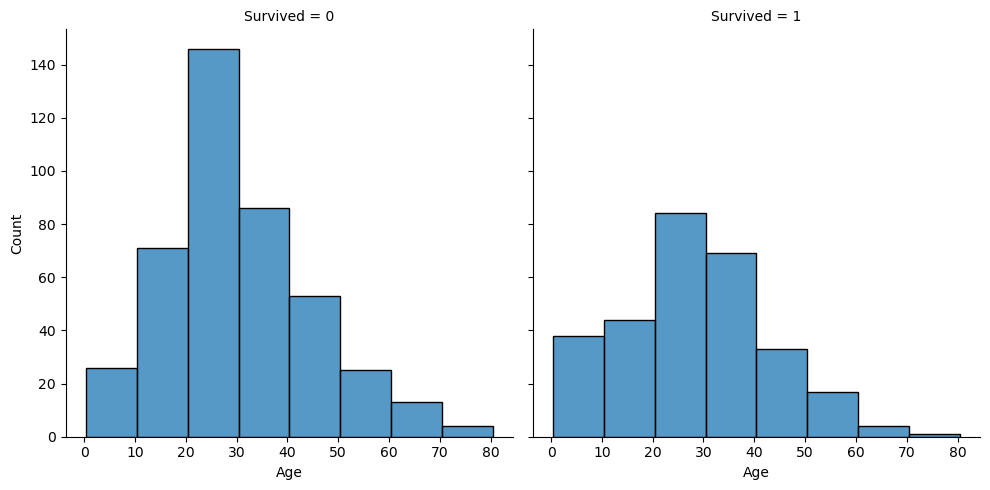

In [19]:
sns.displot(train_df, x="Age", col="Survived", binwidth=10, height=5)

In [20]:
train_df["Age_Cut"] = pd.qcut(train_df["Age"], 8)
test_df["Age_Cut"] = pd.qcut(test_df["Age"], 8)
train_df.groupby(["Age_Cut"], as_index=False)["Survived"].mean()

C:\Users\ratja\AppData\Local\Temp\ipykernel_11716\837528422.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["Age_Cut"], as_index=False)["Survived"].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [21]:
train_df.loc[train_df["Age"]<=16, "Age"]=0
train_df.loc[(train_df["Age"]>16)& (train_df["Age"]<=20.125), "Age"]=1
train_df.loc[(train_df["Age"]>20.125)& (train_df["Age"]<=24), "Age"]=2
train_df.loc[(train_df["Age"]>24)& (train_df["Age"]<=28), "Age"]=3
train_df.loc[(train_df["Age"]>28)& (train_df["Age"]<=32.312), "Age"]=4
train_df.loc[(train_df["Age"]>32.312)& (train_df["Age"]<=38), "Age"]=5
train_df.loc[(train_df["Age"]>38)& (train_df["Age"]<=47), "Age"]=6
train_df.loc[(train_df["Age"]>47)& (train_df["Age"]<=80), "Age"]=7
train_df.loc[train_df["Age"]>80, "Age"]=8

test_df.loc[test_df["Age"]<=16, "Age"]=0
test_df.loc[(test_df["Age"]>16)& (test_df["Age"]<=20.125), "Age"]=1
test_df.loc[(test_df["Age"]>20.125)& (test_df["Age"]<=24), "Age"]=2
test_df.loc[(test_df["Age"]>24)& (test_df["Age"]<=28), "Age"]=3
test_df.loc[(test_df["Age"]>28)& (test_df["Age"]<=32.312), "Age"]=4
test_df.loc[(test_df["Age"]>32.312)& (test_df["Age"]<=38), "Age"]=5
test_df.loc[(test_df["Age"]>38)& (test_df["Age"]<=47), "Age"]=6
test_df.loc[(test_df["Age"]>47)& (test_df["Age"]<=80), "Age"]=7
test_df.loc[test_df["Age"]>80, "Age"]=8

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


C:\Users\ratja\Documents\titanic\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ratja\Documents\titanic\env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratja\Documents\titanic\env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ratja\Documents\titanic\env\Lib\site-packages\seaborn\_oldcore.

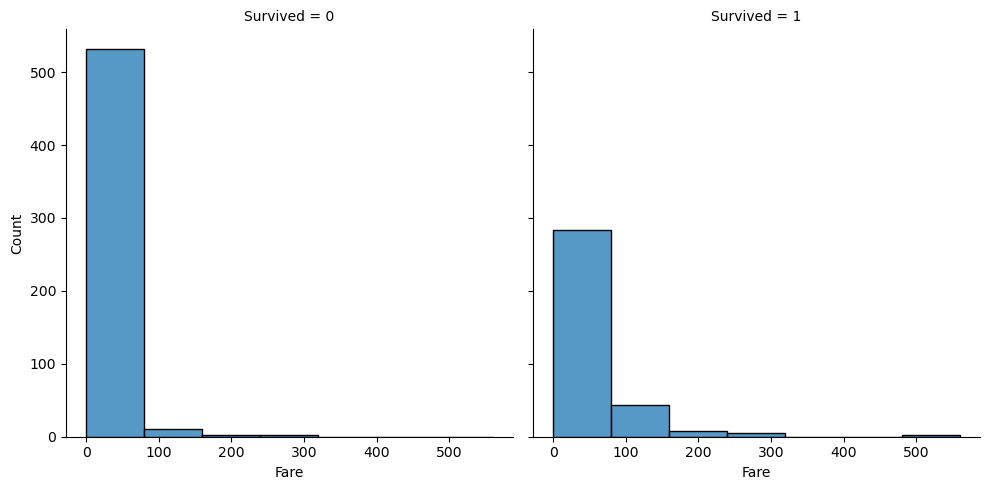

In [23]:
sns.displot(train_df, x="Fare", col="Survived", binwidth=80, height=5)

In [24]:
train_df["Fare_Cut"] = pd.qcut(train_df["Fare"], 6)
test_df["Fare_Cut"] = pd.qcut(test_df["Fare"], 6)

In [25]:
train_df.groupby(["Fare_Cut"], as_index=False)["Survived"].mean()

C:\Users\ratja\AppData\Local\Temp\ipykernel_11716\462564064.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["Fare_Cut"], as_index=False)["Survived"].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [26]:
train_df.loc[train_df["Fare"]<=7.775, "Fare"]=0
train_df.loc[(train_df["Fare"]>7.775)& (train_df["Fare"]<=8.662), "Fare"]=1
train_df.loc[(train_df["Fare"]>8.662)& (train_df["Fare"]<=14.545), "Fare"]=2
train_df.loc[(train_df["Fare"]>14.545)& (train_df["Fare"]<=26), "Fare"]=3
train_df.loc[(train_df["Fare"]>26)& (train_df["Fare"]<=52.369), "Fare"]=4
train_df.loc[(train_df["Fare"]>52.369)& (train_df["Fare"]<=512.329), "Fare"]=5
train_df.loc[train_df["Fare"]>512.329, "Fare"]=6

test_df.loc[test_df["Fare"]<=7.775, "Fare"]=0
test_df.loc[(test_df["Fare"]>7.775)& (test_df["Fare"]<=8.662), "Fare"]=1
test_df.loc[(test_df["Fare"]>8.662)& (test_df["Fare"]<=14.545), "Fare"]=2
test_df.loc[(test_df["Fare"]>14.545)& (test_df["Fare"]<=26), "Fare"]=3
test_df.loc[(test_df["Fare"]>26)& (test_df["Fare"]<=52.369), "Fare"]=4
test_df.loc[(test_df["Fare"]>52.369)& (test_df["Fare"]<=512.329), "Fare"]=5
test_df.loc[test_df["Fare"]>512.329, "Fare"]=6

In [27]:
train_df["Title"] = train_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x: x.strip())
test_df["Title"] = test_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x: x.strip())

In [28]:
train_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [29]:
train_df.groupby(["Title"], as_index=False)["Survived"].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [30]:
train_df["Title"] = train_df["Title"].replace({
    "Capt" : "Military", 
    "Col": "Military",
    "Major": "Military",
    "Jonkheer": "Nobble",
    "the Countess": "Nobble",
    "Don": "Nobble",
    "Lady": "Nobble",
    "Sir": "Nobble",
    "Mlle": "Unmarried_Female",
    "Ms": "Unmarried_Female",
    "Mme": "Unmarried_Female",})

test_df["Title"] = test_df["Title"].replace({
    "Capt" : "Military", 
    "Col": "Military",
    "Major": "Military",
    "Jonkheer": "Nobble",
    "the Countess": "Nobble",
    "Don": "Nobble",
    "Lady": "Nobble",
    "Sir": "Nobble",
    "Mlle": "Unmarried_Female",
    "Ms": "Unmarried_Female",
    "Mme": "Unmarried_Female",})

In [31]:
train_df.groupby(["Title"], as_index=False)["Survived"].agg(["count", "mean"])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Nobble,5,0.600000
7,Rev,6,0.000000
8,Unmarried_Female,4,1.000000


In [32]:
train_df["TicketNumber"] = train_df["Ticket"].apply(lambda x: pd.Series({"Ticket": x.split()[-1]}))
test_df["TicketNumber"] = test_df["Ticket"].apply(lambda x: pd.Series({"Ticket": x.split()[-1]}))

In [33]:
train_df.groupby(["TicketNumber"], as_index=False)["Survived"].agg(["count", "mean"]).sort_values("count", ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [34]:
train_df.groupby("TicketNumber")["TicketNumber"].transform("count")

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [35]:
train_df["TicketNumberCounts"] = train_df.groupby("TicketNumber")["TicketNumber"].transform("count")
test_df["TicketNumberCounts"] = test_df.groupby("TicketNumber")["TicketNumber"].transform("count")

In [36]:
train_df.groupby(["TicketNumberCounts"], as_index=False)["Survived"].agg(["count", "mean"]).sort_values("count", ascending=False)


,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [37]:
train_df["Cabin"] = train_df["Cabin"].fillna("U")
train_df["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else "x" for i in train_df["Cabin"]])

test_df["Cabin"] = test_df["Cabin"].fillna("U")
test_df["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else "x" for i in train_df["Cabin"]])

In [38]:
train_df.groupby(["Cabin"], as_index=False)["Survived"].agg(["count", "mean"])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [39]:
train_df["Cabin_Assigned"] = train_df["Cabin"].apply(lambda x: 0 if x in ["U"] else 1)
test_df["Cabin_Assigned"] = test_df["Cabin"].apply(lambda x: 0 if x in ["U"] else 1)

In [40]:
train_df.groupby(["Cabin_Assigned"], as_index=False)["Survived"].agg(["count", "mean"])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,TicketNumber,TicketNumberCounts,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,U,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,21171,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,17599,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,U,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,3101282,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,113803,2,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,U,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,373450,1,0


In [42]:

train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)
train_df["Fare"].fillna(train_df["Fare"].mean(), inplace=True)


C:\Users\ratja\AppData\Local\Temp\ipykernel_11716\4152956089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
C:\Users\ratja\AppData\Local\Temp\ipykernel_11716\4152956089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [43]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy="most_frequent")

In [44]:
ode_cols = ["Family_Size_Grouped"]
ohe_cols = ["Sex", "Embarked"]

In [45]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]
X_test = test_df.drop(["Age_Cut", "Fare_Cut"], axis =1)

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify =y, random_state=21)

In [47]:
ordinal_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

In [48]:
ohe_pipeline = Pipeline(steps=[
("impute", SimpleImputer(strategy="most_frequent")),
("one-hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [49]:
col_trans = ColumnTransformer(transformers=[
    ("impute", SI, ["Age"]),
    ("ord_pipeline", ordinal_pipeline, ode_cols),
    ("ohe_pipeline", ohe_pipeline, ohe_cols),
    ("passthrough", "passthrough", ["Pclass", "TicketNumberCounts", "Cabin_Assigned", "Age"])
],
                             remainder="drop",
                             n_jobs=-1
                             )

In [50]:
rfc = RandomForestClassifier()

In [51]:
param_grid={
    "n_estimators": [100, 150, 200],
    "min_samples_split": [5, 10, 15],
    "max_depth": [8, 9, 10, 15, 20],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],}

In [52]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [53]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [54]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
0.8384615384615384


In [55]:
dtc = DecisionTreeClassifier()

In [56]:
param_grid={
    "min_samples_split": [5, 10, 15],
    "max_depth": [ 10, 20, 30],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],}

In [57]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [58]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [59]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.8244558258642766


In [60]:
knn = KNeighborsClassifier()

In [61]:
param_grid={
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "algorithm": [ "auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],}

In [62]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [63]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [64]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.8089825667290456


In [65]:
svc = SVC()

In [66]:
param_grid={
    "C": [100, 10, 1.0, 0.1, 0.001, 0.0001],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
        }

In [67]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [68]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.0001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [69]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.8230375258544272


In [70]:
lr = LogisticRegression()

In [71]:
param_grid={
    "C": [100, 10, 1.0, 0.1, 0.001, 0.001],}

In [72]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [73]:
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [74]:


print("Best parameters:", CV_lr.best_params_)
print("Best score:", CV_lr.best_score_)


Best parameters: {'C': 10}
Best score: 0.8117896188318724


In [75]:
gnb = GaussianNB()

In [76]:
param_grid={
    "var_smoothing": [0.00000001, 0.000000001, 0.00000001],}

In [77]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [78]:
pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [79]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7865655471289275


In [80]:
y_pred = pipefinalrfc.predict(X_test)
y_pred2 = pipefinaldtc.predict(X_test)
y_pred3 = pipefinalknn.predict(X_test)
y_pred4 = pipefinalsvc.predict(X_test)
y_pred5 = pipefinallr.predict(X_test)
y_pred6 = pipefinalgnb.predict(X_test)

In [81]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred
})
submission2 = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred2
})
submission3 = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred3
})
submission4 = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred4
})
submission5 = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred5
})
submission6 = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred6
})